# LAB - 06

### 1. Objective
##### The objective of this lab is to gain practical experience with unsupervised learning  by implementing and evaluating three different clustering algorithms: K-Means,  Agglomerative Hierarchical Clustering, and DBSCAN. By the end of this  assignment, you will be able to: 
##### ●   Preprocess data for clustering analysis. 
##### ●   Determine the optimal number of clusters for a given dataset using methods  like the Elbow Method and Dendrograms. 
##### ●   Implement K-Means, Hierarchical, and DBSCAN clustering algorithms using  Python's scikit-learn library. 
##### ●   Visualize and interpret the results of each clustering method. 
##### ●   Compare and contrast the performance and characteristics of different  clustering algorithms. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

### 3. Dataset 
##### For this assignment, we will use the  "Mall Customers"  dataset. This dataset  contains information about customers of a mall, including their gender, age, annual  income, and a calculated "spending score."  
##### The dataset has the following columns: 
#####  ●   CustomerID: A unique identifier for each customer. 
#####  ●   Gender: The customer's gender. 
#####  ●   Age: The customer's age. 
#####  ●   Annual Income (k$): The customer's annual income in thousands of dollars. 
#####  ●   Spending Score (1-100): A score assigned by the mall based on customer  behavior and spending habits.  You can download the dataset from  this Kaggle link  or use a direct CSV link in  your code. For this lab, we will focus on clustering customers based on their Annual Income  and  Spending Score  . 


### 4. Tasks & Procedure 
##### Follow the steps below to complete the assignment. Be sure to comment on your  code and provide explanations for your findings in your final notebook. 
##### Part 1: Data Exploration and Preprocessing 
##### 1.  Load the Data:  Load the Mall_Customers.csv file into  a pandas DataFrame.  2.   Explore the Dataset: 
##### ○   Display the first few rows using .head(). 
##### ○   Get a summary of the data, including data types and non-null values,  using .info(). 
##### ○   Generate descriptive statistics using .describe(). 
##### 3.  Data Selection:  For this lab, we are only interested  in the Annual Income  (k$) and Spending Score (1-100) columns. Create a new DataFrame or a  NumPy array containing only these two features. 
##### 4.  Initial Visualization:  Create a scatter plot of Annual  Income vs. Spending  Score to visualize the distribution of the data points. This will give you an  initial intuition about the potential clusters.

##### Load the Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

##### Explore the Dataset

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Data Selection

In [6]:
final_df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
final_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##### Initial Visualization

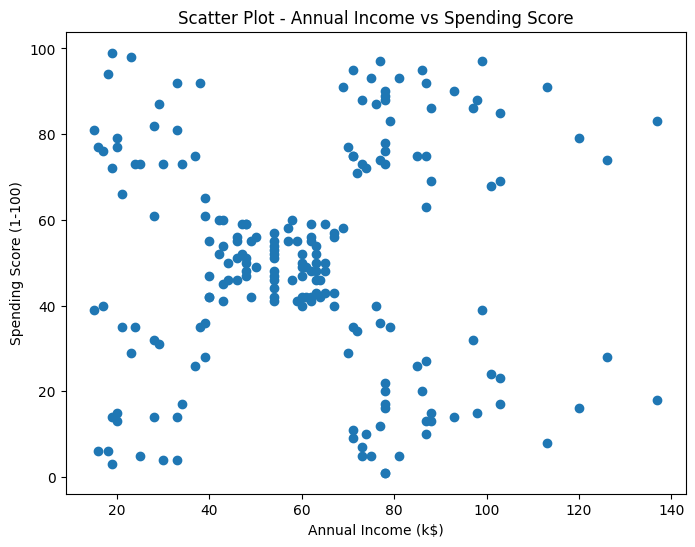

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(final_df['Annual Income (k$)'], final_df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot - Annual Income vs Spending Score")
plt.show()

<Figure size 1200x1000 with 0 Axes>

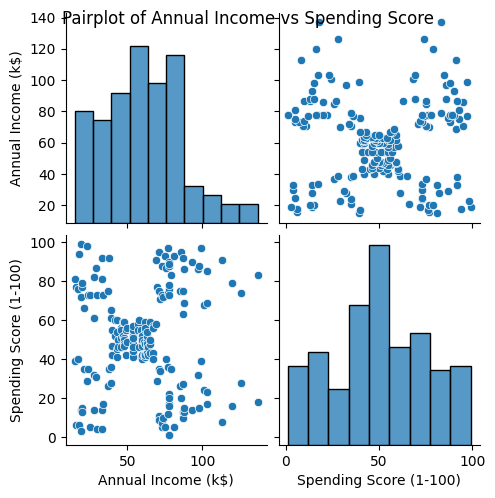

In [9]:
plt.figure(figsize=(12, 10))
sns.pairplot(final_df, diag_kind='hist')
plt.suptitle('Pairplot of Annual Income vs Spending Score')
plt.show()

<Axes: >

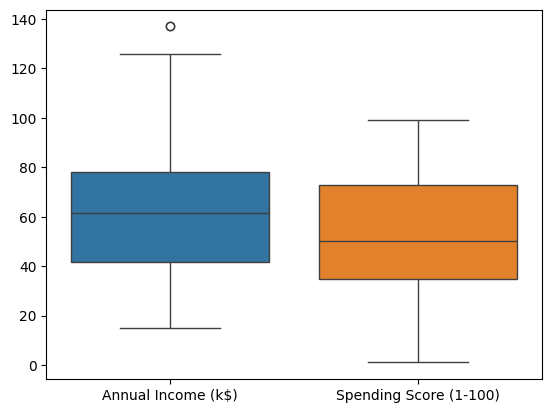

In [10]:
sns.boxplot(final_df)

In [11]:
scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df)

print("Original Data Shape:-",final_df.shape)
print("Scaled Data Shape:-",final_df_scaled.shape)
print("\n Original Data Statistics :-")
print(pd.DataFrame(final_df).describe)
print("\n Scaled Data Statistics :-")
print(pd.DataFrame(final_df_scaled).describe)

Original Data Shape:- (200, 2)
Scaled Data Shape:- (200, 2)

 Original Data Statistics :-
<bound method NDFrame.describe of      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]>

 Scaled Data Statistics :-
<bound method NDFrame.describe of             0         1
0   -1.738999 -0.434801
1   -1.738999  1.195704
2   -1.700830 -1.715913
3   -1.700830  1.040418
4   -1.662660 -0.395980
..        ...       ...
195  2.268791  1.118061
196  2.497807 -0.8618

### Part 2: K-Means Clustering
##### 1.   Finding the Optimal Number of Clusters (k): 
##### ○   Use the  Elbow Method  to determine the optimal value  of 'k'. 
##### ○   Iterate through a range of k values (e.g., 1 to 10). 
##### ○   For each k, fit a KMeans model and calculate the Within-Cluster Sum of  Squares (WCSS), which is the inertia_ attribute of the fitted model. 
##### ○   Plot the WCSS values against the number of clusters (k). The "elbow"  point on the graph indicates the optimal k.  2.   Applying K-Means: 
##### ○   Based on the Elbow Method, choose the optimal k. 
##### ○   Initialize and fit the KMeans model to your data with the chosen number  of clusters. 
##### ○   Get the cluster labels for each data point from the labels_ attribute.  3.   Visualize K-Means Results: 
##### ○   Create a scatter plot of the data points, coloring each point according to  its assigned cluster label. 
##### ○   Plot the centroids of the clusters on the same graph to clearly mark the  center of each group. 
##### ○   Add a title, axis labels, and a legend to your plot. 


### Finding the Optimal Number of Clusters (k)

In [12]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5,random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(final_df_scaled)

print("K-Means Clustering Centers :-")
print(kmeans.cluster_centers_)

print("\nCluster Assignments :-")
print(np.bincount(kmeans_labels))

print(f'\n Inertia (WCSS): {kmeans.inertia_:.2f}')

K-Means Clustering Centers :-
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster Assignments :-
[81 39 22 35 23]

 Inertia (WCSS): 65.57


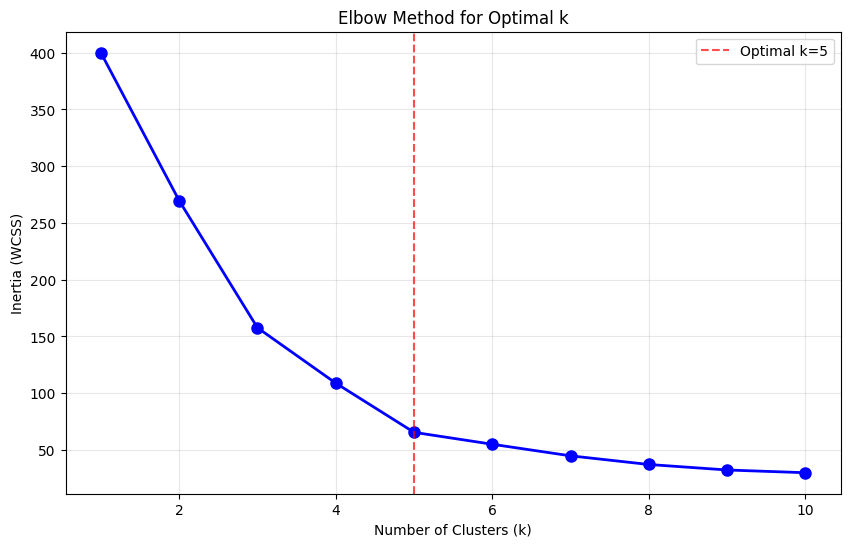

In [13]:
# Elbow method to find optimal number of clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(final_df_scaled)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x = 5,color='red', linestyle='--', alpha=0.7, label='Optimal k=5')
plt.legend()
plt.show()


In [14]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5,random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(final_df_scaled)

print("K-Means Clustering Centers :-")
print(kmeans.cluster_centers_)

print("\nCluster Assignments :-")
print(np.bincount(kmeans_labels))

print(f'\n Inertia (WCSS): {kmeans.inertia_:.2f}')

K-Means Clustering Centers :-
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster Assignments :-
[81 39 22 35 23]

 Inertia (WCSS): 65.57


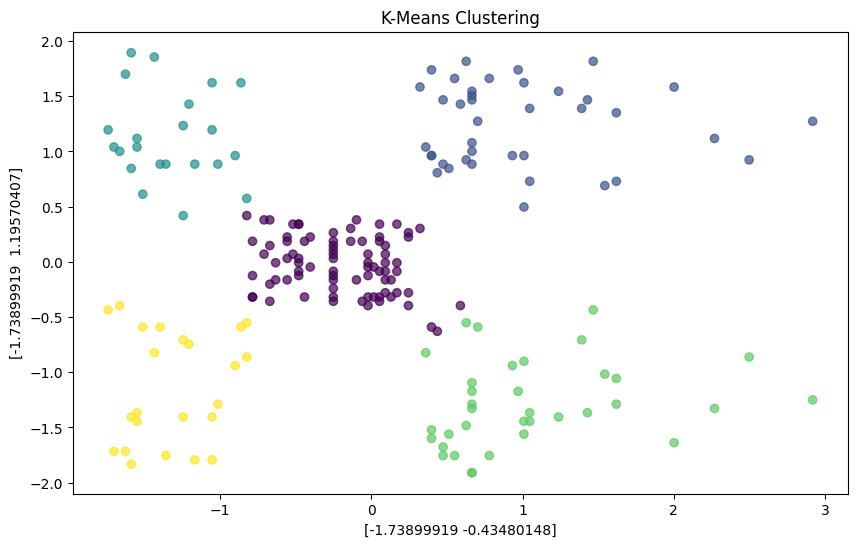

In [15]:
# Visualize K-Means clustering results
plt.figure(figsize=(10, 6))

# K-Means labels
scatter2 = plt.scatter(final_df_scaled[:, 0], final_df_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel(final_df_scaled[0])
plt.ylabel(final_df_scaled[1])
plt.title('K-Means Clustering')
plt.show()

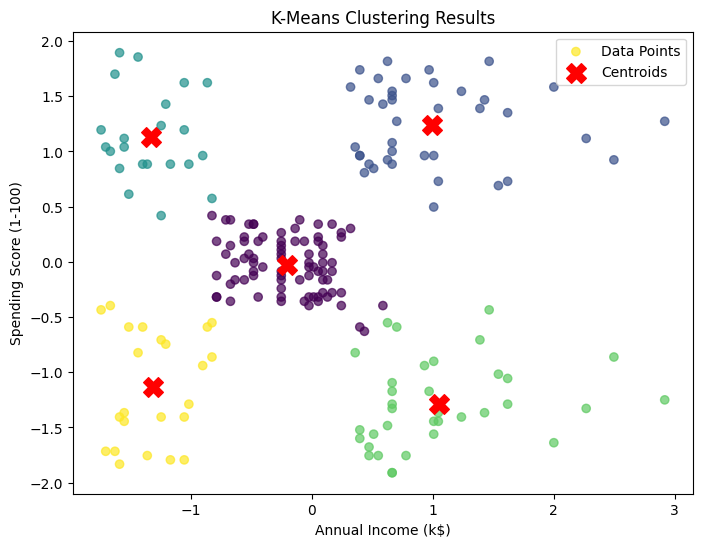

In [16]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    final_df_scaled[:, 0], final_df_scaled[:, 1],
    c=kmeans_labels, cmap='viridis', alpha=0.7, label='Data Points'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

### Part 3: Agglomerative Hierarchical Clustering 

##### 1.   Creating a Dendrogram: 
##### ○   Use the scipy.cluster.hierarchy library to generate a dendrogram for your  data. A ward linkage method is recommended. 
##### ○   Visualize the dendrogram. The y-axis represents the distance between  clusters. The optimal number of clusters can be determined by finding  the tallest vertical line that doesn't cross any extended horizontal lines  and counting the number of vertical lines it intersects.  2.   Applying Hierarchical Clustering: 
##### ○   Based on your analysis of the dendrogram, choose the optimal number  of clusters. 
##### ○   Initialize and fit an AgglomerativeClustering model from scikit-learn  with your chosen number of clusters and ward affinity. 
##### ○   Get the cluster labels for each data point.  3.   Visualize Hierarchical Clustering Results: 
##### ○   Create a scatter plot similar to the one for K-Means, coloring each data  point according to its assigned cluster from the hierarchical model.

### Creating a Dendogram

In [17]:
hierarchical =AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(final_df_scaled)

print("Hierarchical Clustering Assignments :-")
print(np.bincount(hierarchical_labels))

Hierarchical Clustering Assignments :-
[32 39 85 21 23]


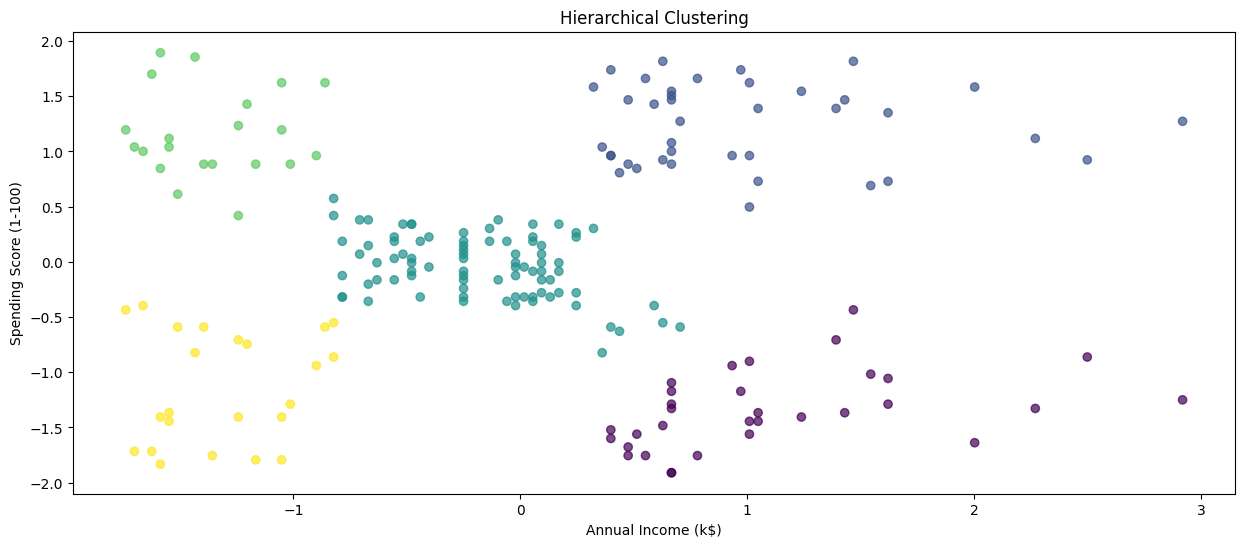

In [48]:
# Visualize Hierarchical clustering results
plt.figure(figsize=(15, 6))

# Hierarchical labels
scatter2 = plt.scatter(final_df_scaled[:, 0], final_df_scaled[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering')
plt.show()

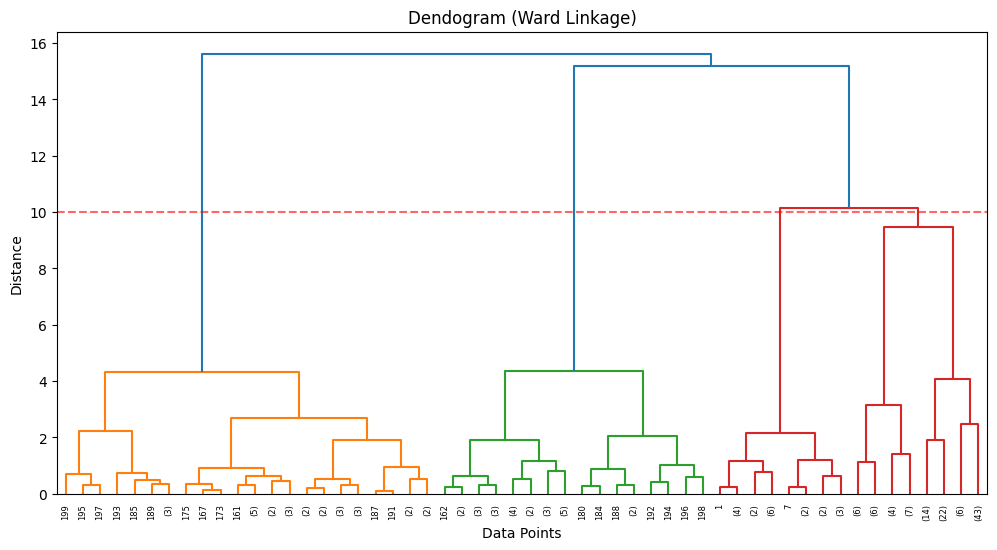

In [42]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=5, color_threshold=None)
plt.title("Dendogram (Ward Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--', alpha=0.6)  
plt.show()

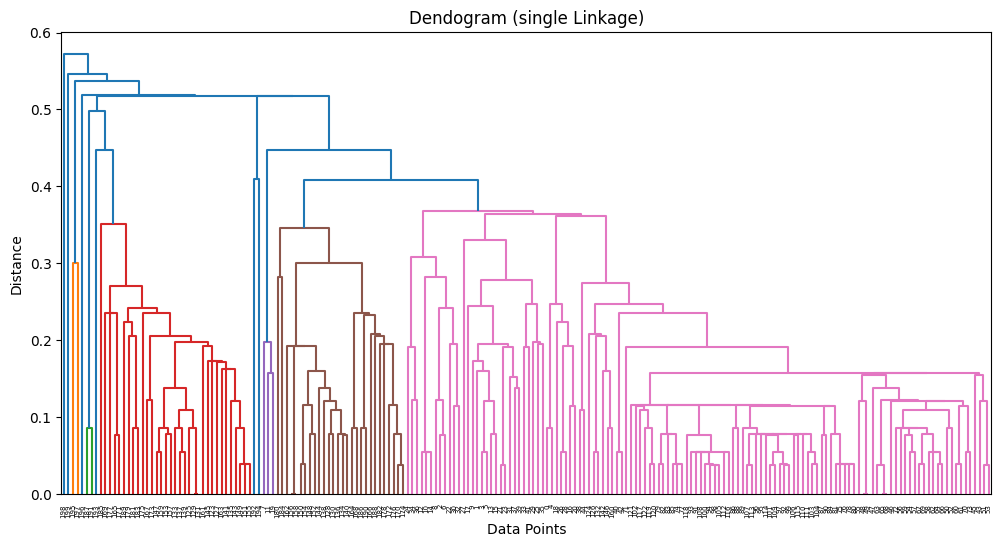

In [45]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='single')
dendrogram(linked)
plt.title("Dendogram (single Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

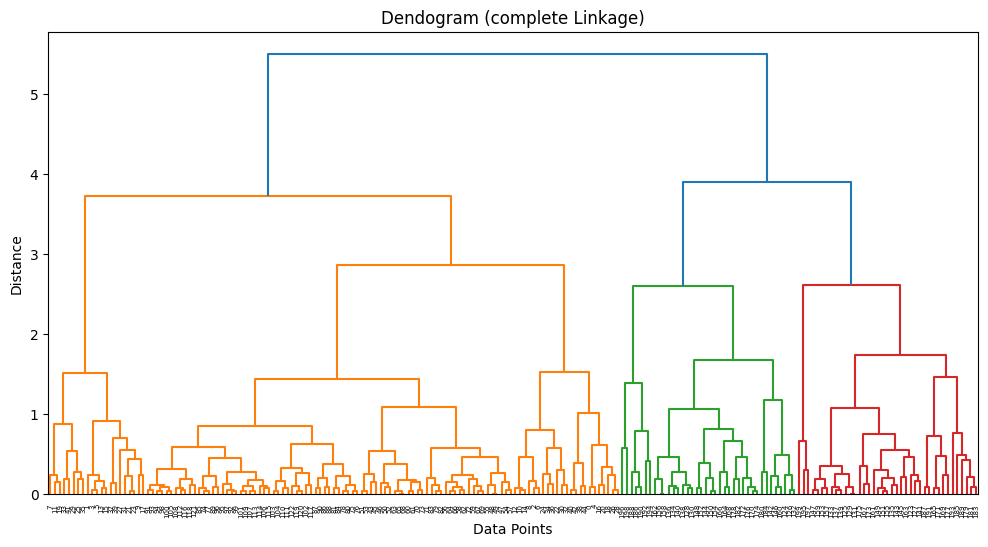

In [23]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='complete')
dendrogram(linked)
plt.title("Dendogram (complete Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

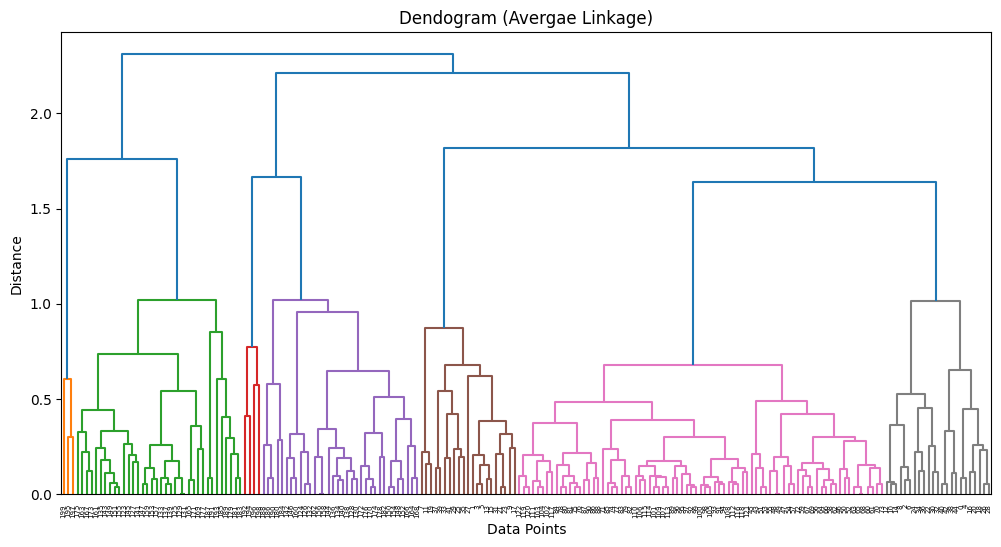

In [25]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='average')
dendrogram(linked)
plt.title("Dendogram (Avergae Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

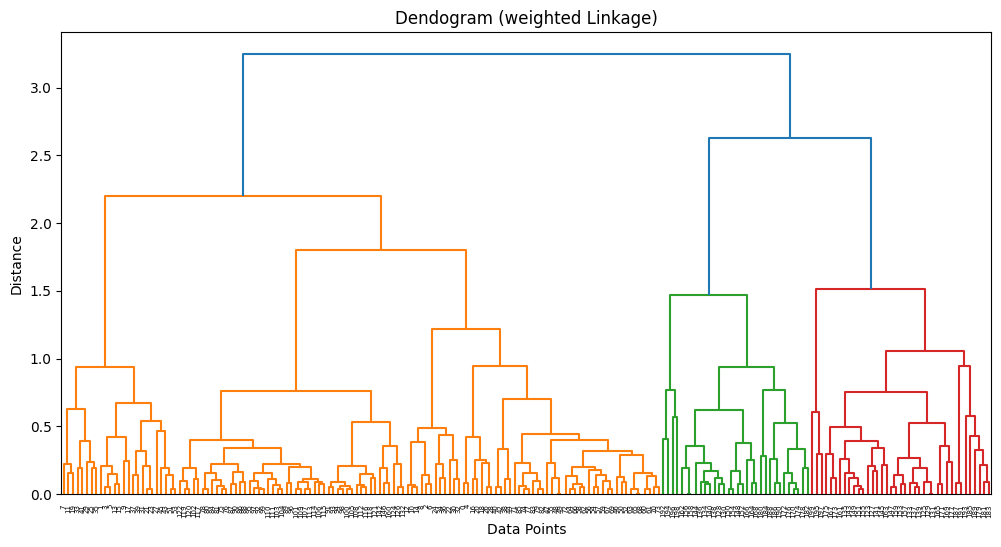

In [27]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='weighted')
dendrogram(linked)
plt.title("Dendogram (weighted Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

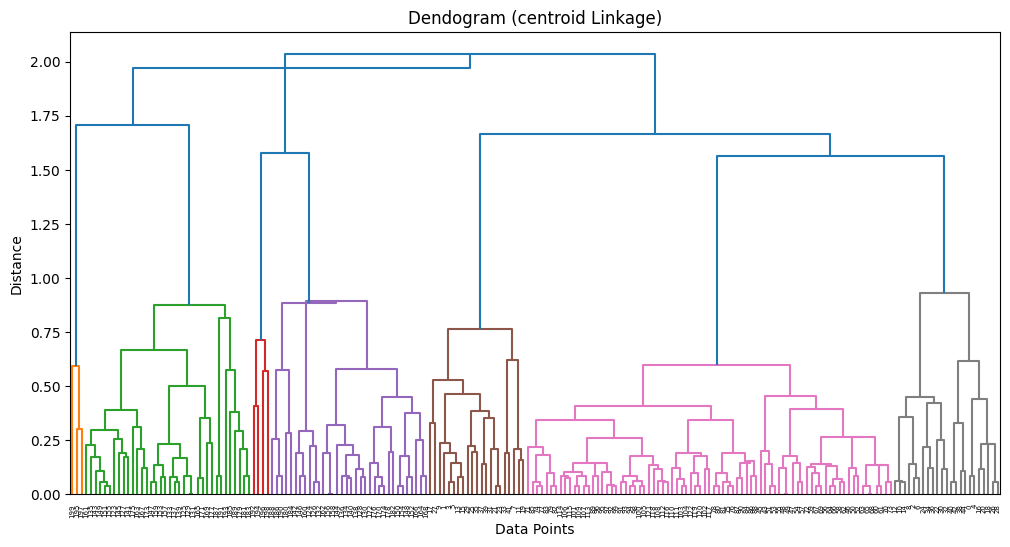

In [29]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='centroid')
dendrogram(linked)
plt.title("Dendogram (centroid Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

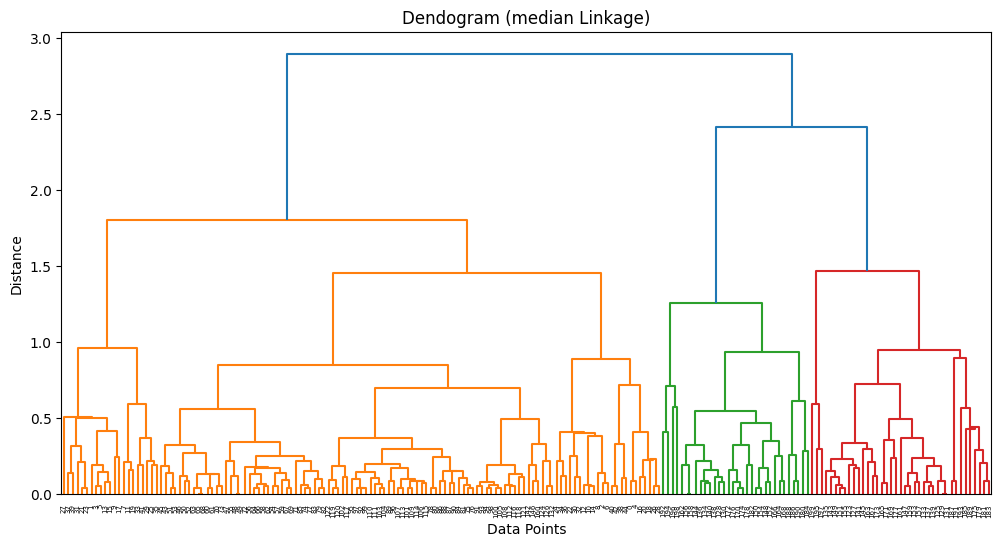

In [31]:
plt.figure(figsize=(12,6))
linked = linkage(final_df_scaled, method='median')
dendrogram(linked)
plt.title("Dendogram (median Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Applying Hierarchical Clustering and Visualize Hierarchical Clustering Results

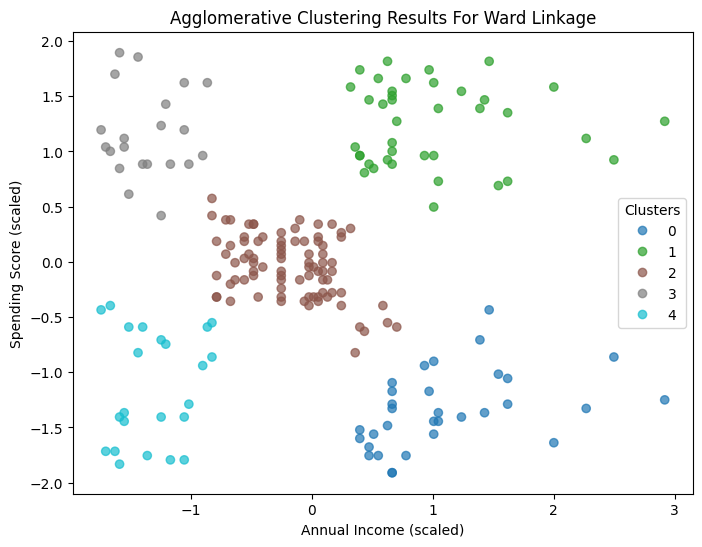

In [33]:
# 2. Applying Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_labels = agglo.fit_predict(final_df_scaled)

# 3. Visualize Hierarchical Clustering Results
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    final_df_scaled[:, 0], final_df_scaled[:, 1],
    c=agglo_labels, cmap='tab10', alpha=0.7, label='Data Points'
)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering Results For Ward Linkage')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

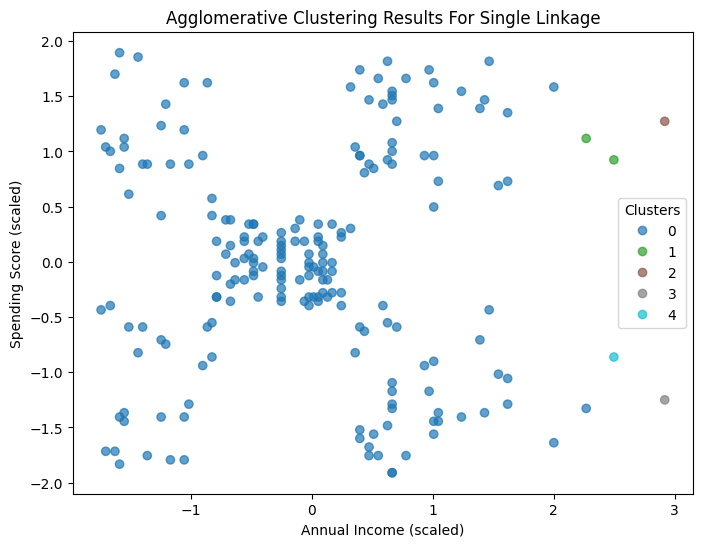

In [34]:
# 2. Applying Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='single')
agglo_labels = agglo.fit_predict(final_df_scaled)

# 3. Visualize Hierarchical Clustering Results
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    final_df_scaled[:, 0], final_df_scaled[:, 1],
    c=agglo_labels, cmap='tab10', alpha=0.7, label='Data Points'
)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering Results For Single Linkage')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

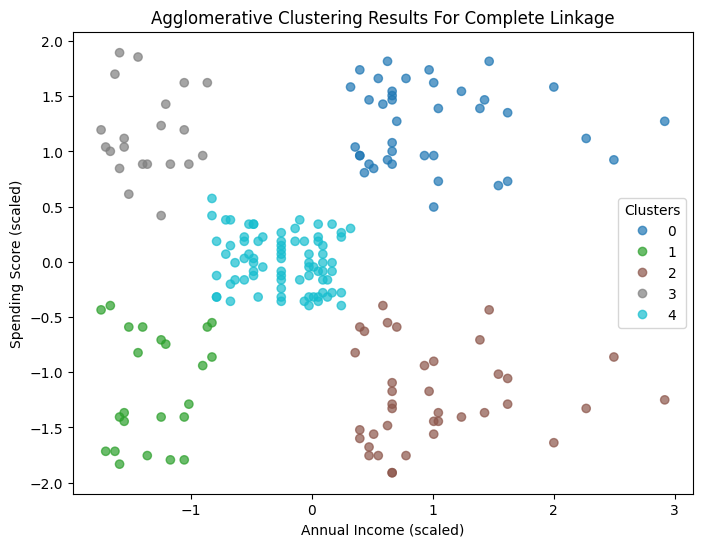

In [35]:
# 2. Applying Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglo_labels = agglo.fit_predict(final_df_scaled)

# 3. Visualize Hierarchical Clustering Results
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    final_df_scaled[:, 0], final_df_scaled[:, 1],
    c=agglo_labels, cmap='tab10', alpha=0.7, label='Data Points'
)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering Results For Complete Linkage')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

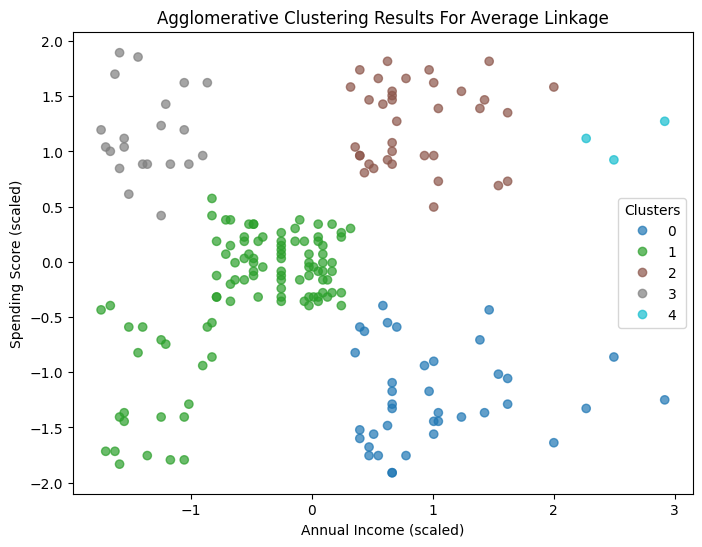

In [36]:
# 2. Applying Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='average')
agglo_labels = agglo.fit_predict(final_df_scaled)

# 3. Visualize Hierarchical Clustering Results
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    final_df_scaled[:, 0], final_df_scaled[:, 1],
    c=agglo_labels, cmap='tab10', alpha=0.7, label='Data Points'
)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering Results For Average Linkage')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

### Part 4: DBSCAN Clustering
##### 1.   Applying DBSCAN: 
##### ○   DBSCAN does not require you to specify the number of clusters  beforehand. Instead, it requires two parameters: eps (the maximum  distance between two samples for one to be considered as in the  neighborhood of the other) and min_samples (the number of samples in  a neighborhood for a point to be considered as a core point). 
##### ○   Experiment with different values for eps and min_samples. A good  starting point for this dataset could be eps=5 and min_samples=5. 
##### ○   Initialize and fit the DBSCAN model to your data. 
##### ○   Get the cluster labels. Note that DBSCAN will label noise points as -1.  2.   Visualize DBSCAN Results: 
##### ○   Create a scatter plot of the data, coloring points by their cluster label. 
##### ○   Make sure to handle the noise points (label -1). It is common practice to  plot them in a distinct color, like black, to differentiate them from the  actual clusters.

### DBSCAN Clustering

In [37]:
dbscan = DBSCAN(eps=0.3, min_samples=6)
dbscan_labels = dbscan.fit_predict(final_df_scaled)

print("DBSCAN Clustering Assignments :-")
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(dbscan_labels == label)}")
    else:
        print(f"Cluster {label}: {np.sum(dbscan_labels == label)} points")

print(f"\nNumber of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")

DBSCAN Clustering Assignments :-
Noise points: 48
Cluster 0: 10 points
Cluster 1: 6 points
Cluster 2: 87 points
Cluster 3: 26 points
Cluster 4: 14 points
Cluster 5: 9 points

Number of clusters: 6
Number of noise points: 48


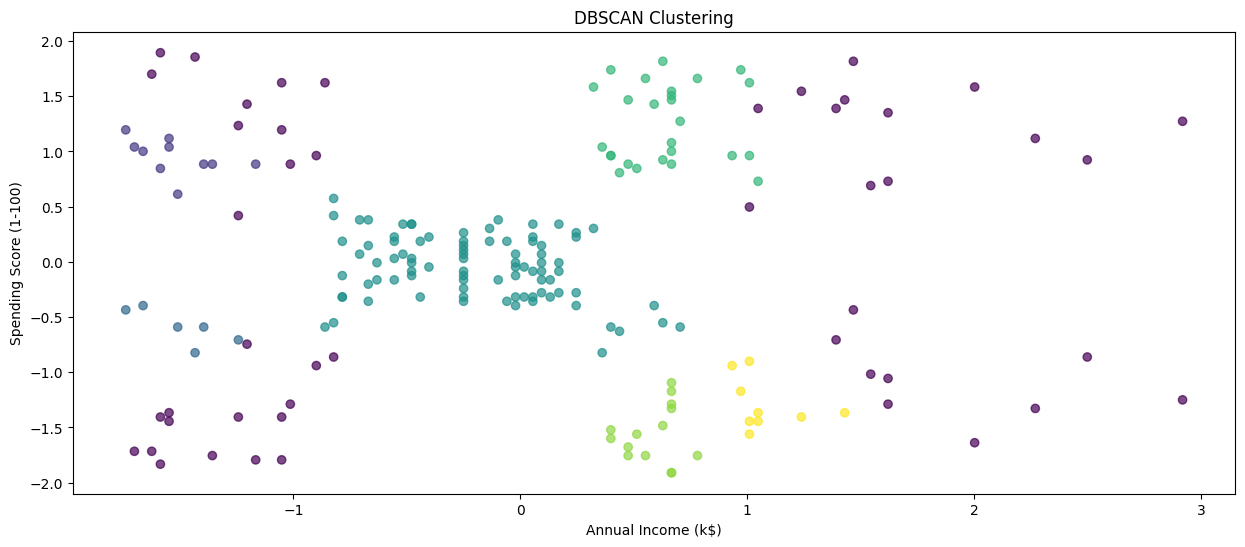

In [49]:
# Visualize DBSCAN clustering results
plt.figure(figsize=(15, 6))
# DBSCAN labels
scatter2 = plt.scatter(final_df_scaled[:, 0], final_df_scaled[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

### Clustering Evaluation

In [39]:

def print_clustering_scores(input, labels, name="Clustering"):
    mask = labels != -1 if -1 in labels else np.ones_like(labels, dtype=bool)
    n_clusters = len(set(labels[mask]))
    print(f"\n{name} Evaluation:")
    if n_clusters > 1:
        sil = silhouette_score(input[mask], labels[mask])
        print(f"Silhouette Score: {sil:.3f}")
    else:
        print("Silhouette Score: Not defined (only one cluster or all noise)")
    db = davies_bouldin_score(input[mask], labels[mask])
    print(f"Davies-Bouldin Index: {db:.3f}")
    ch = calinski_harabasz_score(input[mask], labels[mask])
    print(f"Calinski-Harabasz Index: {ch:.3f}")

print_clustering_scores(final_df_scaled, kmeans_labels, name="K-Means")

print_clustering_scores(final_df_scaled, agglo_labels, name="Agglomerative (Complete)")

print_clustering_scores(final_df_scaled, dbscan_labels, name="DBSCAN")


K-Means Evaluation:
Silhouette Score: 0.555
Davies-Bouldin Index: 0.572
Calinski-Harabasz Index: 248.649

Agglomerative (Complete) Evaluation:
Silhouette Score: 0.479
Davies-Bouldin Index: 0.643
Calinski-Harabasz Index: 143.589

DBSCAN Evaluation:
Silhouette Score: 0.530
Davies-Bouldin Index: 0.604
Calinski-Harabasz Index: 183.773
